# Matplotlib常用技巧

## 1. 导入Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # plt是最常用的接口

## 2. 设置绘图样式

In [2]:
plt.style.use('classic')  # 选择经典（classic）风格，这样画出的图就都是经典的 Matplotlib 风格了

## 3. 用不用show()？如何显示图形

如何显示你的图形，就取决于具体的开发环境了。`Matplotlib` 的最佳实践与你使用的开发环境有关。  
简单来说，就是有三种开发环境，分别是脚本、IPython shell 和 IPython Notebook。

### 3.1. 在脚本中画图

如果你在一个脚本文件中使用 `Matplotlib`，那么显示图形的时候必须使用 `plt.show()`。  
`plt.show()` 会启动一个事件循环（`event loop`），并找到所有当前可用的图形对象，然后打开一个或多个交互式窗口显示图形。

现在有一个名为 `myplot.py` 的文件，你可以从命令行工具中执行这个脚本，然后会看到一个新窗口，里面会显示你的图形：  
```python
python myplot.py
```
`plt.show()` 这行代码在后面完成了许多事情，它需要与你使用的操作系统的图形显示接口进行交互。  
虽然具体的操作细节会因操作系统和安装过程不同而有很大的差异，但是 `Matplotlib` 为你隐藏了所有的细节，非常省心。  
不过有一点需要注意，一个 `Python` 会话（`session`）中**只能**使用一次 `plt.show()`，因此通常都把它放在脚本的最后。  
多个 `plt.show()` 命令会导致难以预料的显示异常，应该尽量避免。

### 3.2. 在IPython shell中画图

在 `IPython shell` 中交互式地使用 `Matplotlib` 画图非常方便（详情请参见第 1 章），在 `IPython` 启动 `Matplotlib` 模式就可以使用它。  
为了启用这个模式，你需要在启动 `ipython` 后使用 `%matplotlib` 魔法命令：

In [3]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: agg


此后的任何 `plt` 命令都会自动打开一个图形窗口，增加新的命令，图形就会更新。  
有一些变化（例如改变已经画好的线条属性）不会自动及时更新；对于这些变化，可以使用 `plt.draw()` 强制更新。  
在 `IPython shell` 中启动 `Matplotlib` 模式之后，就不需要使用 `plt.show()` 了。

### 3.3. 在IPython Notebook中画图

`IPython Notebook` 是一款基于浏览器的交互式数据分析工具，可以将描述性文字、代码、图形、`HTML` 元素以及更多的媒体形式组合起来，集成到单个可执行的 `Notebook` 文档中（详情请参见第 1 章）。  
用 `IPython Notebook` 进行交互式画图与使用 `IPython shell` 类似，也需要使用 `%matplotlib` 命令。你可以将图形直接嵌在 `IPython Notebook` 页面中，有两种展现形式。  
- `%matplotlib notebook` 会在 `Notebook` 中启动**交互式**图形。
- `%matplotlib inline` 会在 `Notebook` 中启动**静态**图形。  
运行命令之后（每一个 `Notebook` 核心任务 / 会话只需要运行一次），在每一个 `Notebook` 的单元中创建图形就会直接将 `PNG` 格式图形文件嵌入在单元中，如下图所示：

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

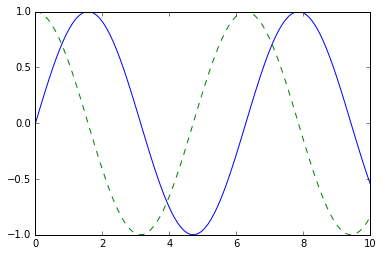

In [5]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

## 4. 将图形保存为文件

`Matplotlib` 的一个优点是能够将图形保存为各种不同的数据格式。你可以用 `savefig()` 命令将图形保存为文件。

In [6]:
fig.savefig('my_figure.png')  # 文件格式会根据后缀名自动解析

In [7]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 26K Sep 24 01:09 my_figure.png


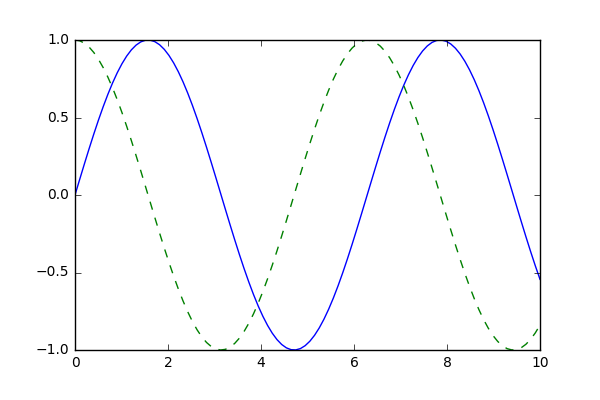

In [8]:
from IPython.display import Image

Image('my_figure.png')  # 用 IPython 的 Image 对象来显示文件内容

在 `savefig()` 里面，保存的图片文件格式就是文件的扩展名。  
`Matplotlib` 支持许多图形格式，具体格式由操作系统已安装的图形显示接口决定。  
你可以通过 `canvas` 对象的方法查看系统支持的文件格式：

In [9]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

需要注意的是，当你保存图形文件时，不需要使用 `plt.show()` 或者前面介绍过的命令。